<b>Group Number: 5</b> 
<br><b>Name Group Member 1: Anton Sewergin</b> 
<br><b>u-Kürzel Group Member 1: uhsno</b> 
<br><b>Name Group Member 2: Jan Schmidgen</b> 
<br><b>u-Kürzel Group Member 2: utwub</b> 

# Introduction

Decision trees are the building blocks of some of the most powerful **supervised learning** e.g. having a pre-defined target variable methods that are used today. if you have ever had to diagnose a problem with an appliance, car or a computer, there is a good chance you have encountered a troubleshooting flowchart. Flow diagrams are actually visual representations of decision trees. For example, Higher School of Economics publishes information diagrams to make the lives of its employees easier. Here is a snippet of instructions for publishing a paper on the Institution portal. 
<img src="images/snipped.png">

# Classification and Regression Trees (CART)

Classification and Regression Trees is an acronym introduced by Leo Breiman in 1984 to refer to Decision Tree algorithms that can be used for predictive modeling problems. We will focus on the CART algorithm in this tutorial.

## CART

The representation of the CART model is a binary decision tree. This is the same binary tree from algorithms and data structures (each node can have zero, one or two child nodes).

A node represents a single input variable (X) and a split point on that variable, assuming the variable is numeric. The leaf or terminal nodes of the tree contain an output variable (Y) which is used to make a prediction. 

Creating a binary decision tree is actually a process of dividing up the input space. The so-called recursive binary splitting is used to separate the input space (greedy approach). This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function.

The split with the best cost (lowest cost because we minimize costs) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner based on the cost function.

- **Regression:** The cost function that is minimized to choose split points is the **sum squared error** across all training samples that fall within the rectangle.

- **Classification:** The *Gini* cost function is used which provides an indication of how pure the nodes are, where node purity refers to how mixed the training data assigned to each node is.

Splitting continues until nodes contain a minimum number of training examples or a maximum tree depth is reached.

In this exercise we are only focusing on the classification property of the algorithm.

## Metrics

### Gini Index

The Gini index is the name of the cost function used to evaluate the splits in the dataset. A split involves one input attribute and one value for that attribute. A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst split e.g. 50/50 split results in a Gini score of 0.5 for a two class problem.

Calculating the gini score is best demonstrated with an example:

<img src="images/iris_tree.png">

Suppose you find an iris flower and you want to classify it. In the figure above, we start at the *root node*: this node asks wether the flower's pedal length is smaller than 2.45 cm. If it is the case, then we move down to the root's left child node. In this case it is a *leaf node*, because it does not have any children. 

Now suppose we find another flower with the difference that the petal length is greater than 2.45 cm. We move down to the root's right child node which is not a leaf node. It asks another question: is the petal width smaller than 1.75 cm ? If it is, then our flower is most likely an Iris-Versicolor. If not, it is probably an Iris-Virginica.

For example, 100 trainig instances have a petal length greater than 2.45 cm, among which 54 have a petal width smaller than 1.75 cm. A node's value attribute tells us how many training instances of each class this node applies to: the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica. According to equation (\ref{eq1}) the gini score is comupted as followed: $1-(0/54)^2-(49/54)^2-(5/54)^2 = 0.168$.

\begin{equation*}
G_i = 1 - \sum_{k=1}^n p_{i,k}^2
\label{eq1}\tag{1}
\end{equation*}
where $p_{i,k}$ describes the ratio of class k instances among the training instances in the $i^{th}$ node.

# Imports

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from typing import *

from lama.checkpoints import lama_compare_checkpoint


# 2 Decision Trees with scikit-learn

Now we finally prepared our dataset to be used in Machine Learning algorithms. In the beginning, we outlined the idea of classification and regression with Decision Trees. In the following we will use the scikit-learn implementation of decision trees to perform the binary classification of the Titanic dataset.

## 2.1 Decision tree without parameter tuning

### 2.1.1 Importing the libraries
The first step is to use the algorithm "as is" without tuning of any parameters. Therefore import the necessary library/function of scikit-learn that contains the DecisionTreeClassifier. To evaluate the model we need to generate a train and validation set using the train-test split of scikit-learn. Hence, import the necessary functions. As a baseline for comparing the performance of the trained decision tree, we need to import the DummyClassifier. The DummyClassifer https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html is able to classify data points uniformly at random or to always predict the most frequent label in the training set. Import the accuracy score of the package 'metrics' for the evaluation of the classification results.


<div class="alert alert-block alert-success">
<b>Task:</b> Use the following code for all needed imports

</li>
</ul>
</div>

In [2]:
# STUDENT CODE HERE (1pt)

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# STUDENT CODE until HERE

### 2.1.2 Generating the Train, Validation and Test set


<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Load the solution datasets that were prepared by the solution data preparation file (train_prepared.csv,...).
<li> Get the column with the label data in both the train and test set and drop it from the datasets.
<li>Split the 'train' part of the dataset in 80% training data and 20% validation data. Use parameter random_state = 17 for results reproducibility.
<li> Note: You might need the original train set ('train' part before splitting it up into tr/val) later for cross-validation.
</ul>
    
<b>Critical Information:</b> Using supervised learning datasets always consist of Labels and Features. Once you've trained your model, you will give it sets of new input containing features (Age, Sex etc.); it will return the predicted label (Survived) for that person.\n
</div>

In [3]:
x_train: pd.DataFrame
x_val: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_val: pd.Series
y_test: pd.Series

X_train_unsplitted: pd.DataFrame # train dataset before splitting it up into tr/val
Y_train_unsplitted: pd.DataFrame
# STUDENT CODE HERE (2pt)

X_train_unsplitted = pd.read_csv("data/train_prepared.csv")
Y_train_unsplitted = X_train_unsplitted['Survived']
X_train_unsplitted = X_train_unsplitted.drop(columns='Survived')

train = ...
test = ...


x_test = pd.read_csv("data/train_prepared.csv")
y_test = x_test['Survived']
x_test = x_test.drop(columns='Survived')

x_train, x_val, y_train, y_val = train_test_split(X_train_unsplitted, Y_train_unsplitted, train_size=0.8, random_state=17)

# STUDENT CODE until HERE

#Sanity checks
assert len(x_train.columns) & len(x_val.columns) == 8, f'Number of features expected was 8, but found {len(x_train.columns)} and {len(x_val.columns)} features.'
assert len(x_train) & len(y_train) == 712, f'Number of samples expected in the train datasets was 712, but found {len(x_train)} and {len(y_train)} samples.'
assert len(x_val) & len(y_val) == 179, f'Number of samples expected in the validation datasets was 179, but found {len(x_val)} and {len(x_val)} samples.'

### 2.1.3 Validation of the Decision Tree

To get an idea whether the classification with the model makes sense, we use the DummyClassifier that decides randomly. 

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Train the classifier with the corresponding parameter value 'most_frequent' for strategy
<li> Use for the parameter random_state = 17 (for results reproducibility)
<li> Calculate and display the accuray to get the classification accuracy on the validation data (Hint: Look at `sklearn.metrics.accuracy_score`)
<li> Hint: Check the website from scikit-learn to import the Classifier, train it, predict with it and calculate the accuracy
</ul>
</div>

In [4]:
# STUDENT CODE HERE (2pt)

clf = DummyClassifier(strategy='most_frequent' , random_state=17)

clf.fit(x_train, y_train)
print(accuracy_score(y_test, clf.predict(x_test)))

# STUDENT CODE until HERE

0.6161616161616161


<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Train a decision tree (DecisionTreeClassifier) with a maximum depth of 2
<li> Evaluate and display the accuracy metric on the validation data.
<li> Use parameter random_state = 17 for results reproducibility.
<li> Hint: Syntax or functions with this classifier are the same for training etc.
    </li>
    
</ul>
</div>

In [5]:
# STUDENT CODE HERE (2pt)

decision_tree = DecisionTreeClassifier(max_depth=2, random_state=17)

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)
print(accuracy_score(y_val, y_pred))

# STUDENT CODE until HERE


# compare your result with the checkpoint
lama_compare_checkpoint(round(accuracy_score(y_pred, y_val), 4), 't3/checkpoint2_1.pkl')

0.7821229050279329
Your data looks alright, you can continue with the workbook


True

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Answer the following questions in the answer block below and indicate which question your answer is referring to:<br>

1. What is your interpretation of the DummyClassifiers classification accuracy? <br>
2. What do you observe if we compare the classification accuracy of the DecisionTree to that of the DummyClassifier?

</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
    
1. Because the dummy classifies everything as the most common class, the accuracy should be the percentage of the most common class.<br>
2. The real classifier performs much better.
</div>

### 2.1.4 Understanding the trained model 


<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Plot the tree with sklearn.tree.plot_tree
<li> Print the feature names as well as the class names according to the dataset.
<li> Hint: Use dataframe.columns.values
</ul>
</div>

0 Pclass _________ 
1 Sex ____________ females = 1, males = 0
2 Age ____________ 
3 Parch __________ 
4 Fare ___________ 
5 Name_length ____ 
6 Fare_log _______ 
7 Fare_bin _______ fare_bin = int fare_log


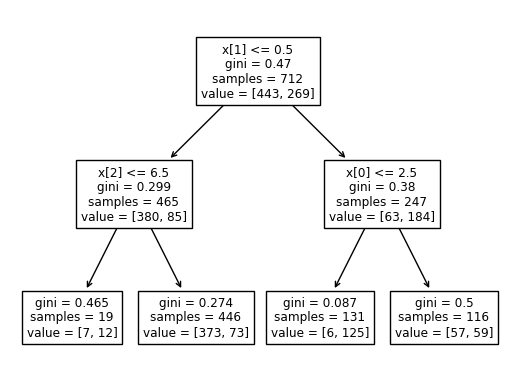

In [6]:
# STUDENT CODE HERE (1pt)
from sklearn import tree

meaning = ['', 'females = 1, males = 0', '', '', '', '', '', 'fare_bin = int fare_log']

tree.plot_tree(decision_tree)
for n, col_name in enumerate(x_train.columns):
    print(n, col_name, '_'*(15-len(col_name)), meaning[n])

# STUDENT CODE until HERE


<div class="alert alert-block alert-success">
<b>Question (1pt):</b>  Which features are used to make predictions in the created decision tree? Which of the remaining splits (in the last row of the tree) is currently the most accurate?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> Feature, Sex and Passenger Class are used to decide the class, x[2] split is the most accurate.
</div>

### 2.1.5 Testing generalization

In the previous tasks we have evaluated the performance of our algorithm on a single train-test split of our train dataset. Let's use cross-validation to get a better estimate of the generalization error. 
<div class="alert alert-block alert-success">
<b>Task:</b> Import the necessary library for cross validation with StratifiedKFold.

</li>
</ul>
</div>

In [7]:
# STUDENT CODE HERE (1pt)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Perform a 5-fold stratified cross validation
<li> Calculate the mean accuracy and the standard deviation of the accuracy
<li> Use a maximum depth of 2 and random_state = 17 for tree and the folds
<li> Do not forget to use the whole training set (before splitting it up into train,val)
</ul>

</div>

In [8]:
# STUDENT CODE HERE (3pt)

decision_tree = DecisionTreeClassifier(max_depth=2, random_state=17)

skf = StratifiedKFold(n_splits=5)

c_v_score = cross_val_score(decision_tree, X_train_unsplitted, Y_train_unsplitted, cv=skf, scoring='accuracy')

acc1 = c_v_score.mean()

print(f'mean: {c_v_score.mean()}, std: {c_v_score.std()}')

# STUDENT CODE until HERE


# compare your result with the checkpoint
lama_compare_checkpoint(round(acc1, 4), 't3/checkpoint2_2.pkl')


mean: 0.773316176009039, std: 0.018622169528288927
Your data looks alright, you can continue with the workbook


True

## 2.2 Parameter Optimization for Decision Trees

The most important parameter of a decision tree is the depth of the tree. Hence, it is necessary to evaluate different depths of the tree to achieve the optimal performance regarding the classification accuracy. For that purpose we use grid search combined with the cross validation process we have used before. Luckily, scikit-learn has already implemented a nice and easy to use interface for that problem. The function is called `GridSearchCV` and can be found in the sklearn.model_selection library. 

### 2.2.1 Using Grid Search Cross-Validation to optimize the tree depth

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Load the GridSearchCV library and train a decision tree (DecisionTreeClassifier, random_state = 17)
<li> Find the optimal maximum depth using 5-fold stratified cross-validation (without RandomState)
<li> Vary the depth of the tree between 1 and 13. range(1,13)
<li> Do not forget to use the whole training set (before splitting it up into train,val)
<li> Hint: Use the scikit-learn website for more information on the functions
</ul>
</div>

In [9]:
# STUDENT CODE HERE (2pt)
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 14)}

tree_classifier = DecisionTreeClassifier(random_state=17)

stratified_cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(tree_classifier, param_grid, scoring='accuracy', cv=stratified_cv)

grid_search.fit(X_train_unsplitted, Y_train_unsplitted)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')
# STUDENT CODE until HERE

Best Parameters: {'max_depth': 3}
Best Accuracy: 0.8069612704789405


<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Draw a plot to show the mean accuracy over depth 
<li> Use the attribute <code>.cv_results</code> to get mean accuracy by using 'mean_test_score'
</ul>
</div>

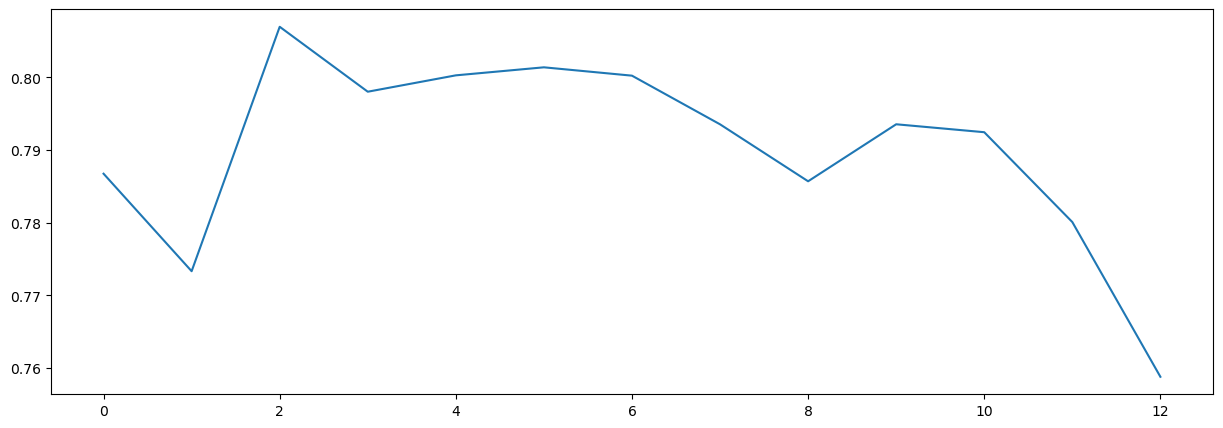

In [10]:
# STUDENT CODE HERE (4pt)

cv_results = grid_search.cv_results_

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(range(len(cv_results['mean_test_score'])), cv_results['mean_test_score'])



# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Task:</b> Use the code block below to find out and display the following: 
    <ul>
    <li> What are the best parameter values? </li>
    <li> What is the accuracy (cross-val) of the model with that tree depth?</li>
    </ul>
</div>

In [11]:
# STUDENT CODE HERE (1pt)

best_param =grid_search.best_params_
print(f'Best Accuracy: {grid_search.best_score_}')
# STUDENT CODE until HERE


# compare your result with the checkpoint
lama_compare_checkpoint(best_param["max_depth"], 't3/checkpoint2_3.pkl')

Best Accuracy: 0.8069612704789405
Your data looks alright, you can continue with the workbook


True

We found the optimal parameter regarding our training data. Finally, we can evaluate the performance using all of our training data to train and test with the test data set. 

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Train a decision tree with the maximum depth you got above using all training data (no cross-validation)
<li> Compute the accuracy on the test data set. Use parameter random_state = 17 for reproducibility.
</ul>
</div>


In [12]:
decision_tree: DecisionTreeClassifier
# STUDENT CODE HERE (1pt)
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)
print(accuracy_score(y_val, y_pred))

# STUDENT CODE until HERE

0.7932960893854749


[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]\nclass = Dead'),
 Text(0.25, 0.625, 'Age <= 6.5\ngini = 0.299\nsamples = 465\nvalue = [380, 85]\nclass = Dead'),
 Text(0.125, 0.375, 'Pclass <= 2.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = Dead'),
 Text(0.375, 0.375, 'Pclass <= 1.5\ngini = 0.274\nsamples = 446\nvalue = [373, 73]\nclass = Dead'),
 Text(0.3125, 0.125, 'gini = 0.453\nsamples = 95\nvalue = [62, 33]\nclass = Dead'),
 Text(0.4375, 0.125, 'gini = 0.202\nsamples = 351\nvalue = [311, 40]\nclass = Dead'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.38\nsamples = 247\nvalue = [63, 184]\nclass = Survived'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.087\nsamples = 131\nvalue = [6, 125]\nclass = Survived'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 

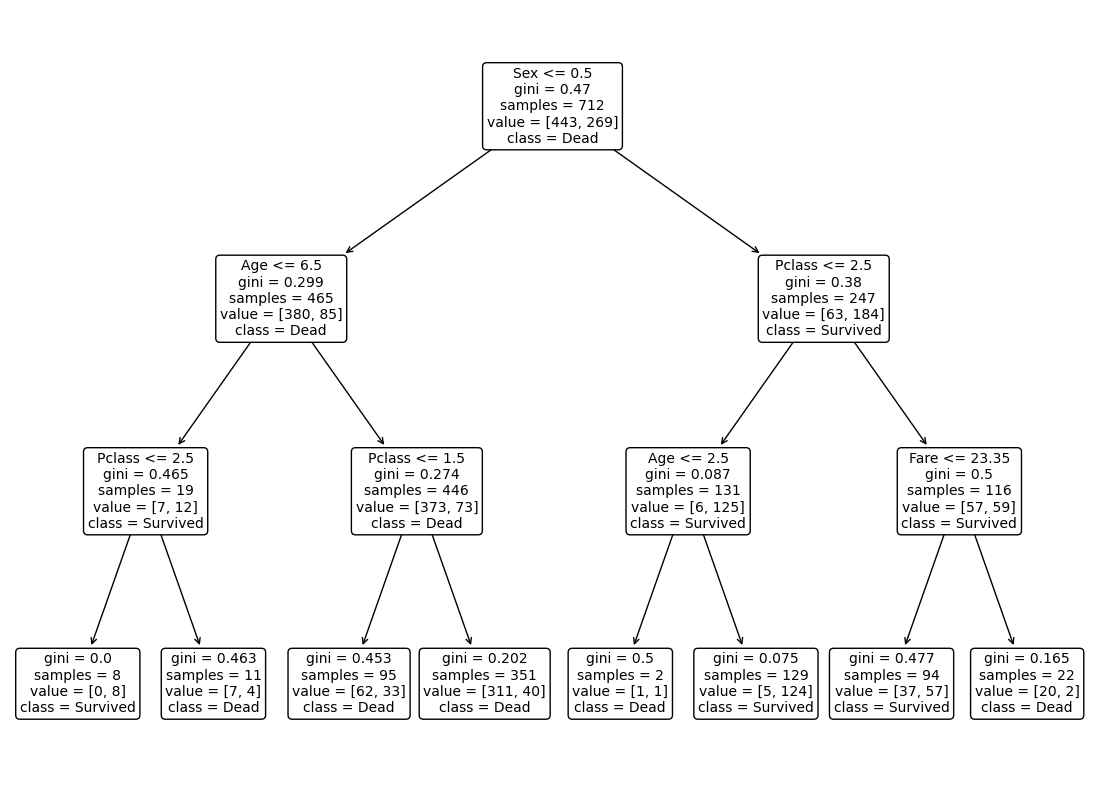

In [13]:
plt.figure(figsize=(14,10))
tree.plot_tree(decision_tree, 
               feature_names=x_train.columns.values,
               class_names=['Dead','Survived'], 
               rounded=True, 
               fontsize=10)

### 2.2.2 Comparing the results to the un-optimized version


<div class="alert alert-block alert-success">
<b>Task:</b> Сalculate the effect of GridSearchCV
<ul>
<li> Use the expression (acc2 - acc1) / acc1 * 100%
<li> acc1 and acc2 are accuracies of cross-validation before and after tuning max_depth with GridSearchCV
<li> Hint: acc1 was already used before optimization, just calculate acc2 for comparison
<li> Print the improvement (calculated by the expression) and the mean accuracy of the optimized dec_tree
</ul>
</div>


In [14]:
# STUDENT CODE HERE (2pt)

skf = StratifiedKFold(n_splits=5)

c_v_score = cross_val_score(decision_tree, X_train_unsplitted, Y_train_unsplitted, cv=skf, scoring='accuracy')

acc2 = c_v_score.mean()

eff = (acc2 - acc1) / acc1
print(eff)
# STUDENT CODE until HERE


# compare your result with the checkpoint
lama_compare_checkpoint(round(acc2,4), 't3/checkpoint2_4.pkl')

0.0435075529436594
Your data looks alright, you can continue with the workbook


True

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> What are the advantages of the grid search process?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> One can find the optimum value for parameters.
</div>

### 2.3 Influence of Scaling

As a last step we want to evaluate the influence of different scaling to our training data.

#### 2.3.1 Scaling the Datasets with Standard Scaler and MinMaxScaler


<div class="alert alert-block alert-success">
<b>Task:</b> 

Load the functions needed for the StandardScaler and the MinMaxScaler included in sklearn.preprocessing.

</div>

In [15]:
# STUDENT CODE HERE (1pt)
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Task:</b> Prepare two different datasets, one scaled with StandardScaler and the other one using MinMaxScaler.
<ul>
<li> Create the respective scalers and use the <code>.fit_transform()</code> method by using the whole training dataset
<li> Then transform the test dataset with the 'fitted' scalers using the transform function

</ul>
</div>


In [16]:
x_train_std: np.ndarray
x_test_std: np.ndarray
x_train_minMax: np.ndarray
x_test_minMax: np.ndarray

# STUDENT CODE HERE (2pt)

min_max_scale = MinMaxScaler().fit(X_train_unsplitted)

x_train_minMax = min_max_scale.transform(x_train)
x_test_minMax = min_max_scale.transform(x_test)



standard_scale = StandardScaler().fit(X_train_unsplitted)

x_train_std = standard_scale.transform(x_train)
x_test_std = standard_scale.transform(x_test)

# STUDENT CODE until HERE   

#Sanity Check
assert (np.abs(np.mean(x_train_std)) < 0.000000001) ^ (np.abs(np.mean(x_test_std)) < 0.000000001), f'Expected either train or test set to be fitted for scaling.'
assert (np.std(x_train_std) - 1 < 0.000000001) ^ (np.std(x_test_std) - 1 < 0.000000001), f'Expected either train or test set to be fitted for scaling.'
assert (np.max(x_train_minMax[:,2]) == 1) ^ (np.max(x_test_minMax[:,2]) == 1), f'Expected either train or test set to be fitted for scaling.'


AssertionError: Expected either train or test set to be fitted for scaling.

### 2.3.2 Evaluate the performance on the scaled datasets



<div class="alert alert-block alert-success">
<b>Task:</b> Now train two decision tree models for each of the newly scaled datasets (with random_state = 17)
<ul>
<li> Calculate the accuracy on the test dataset for both datasets</li>
<li> Use a maximum depth of 3 for the training process </li>
</ul>
</div>


In [17]:
# Standard Scaler dataset
# STUDENT CODE HERE (2pt)

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

decision_tree.fit(x_train_std, y_train)
y_pred = decision_tree.predict(x_test_std)

print(accuracy_score(y_test, y_pred))
# STUDENT CODE until HERE

0.8215488215488216


In [18]:
# Min-Max Scaler dataset
# STUDENT CODE HERE (2pt)
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

decision_tree.fit(x_train_minMax, y_train)
y_pred = decision_tree.predict(x_test_minMax)

print(accuracy_score(y_test, y_pred))

# STUDENT CODE until HERE

0.8215488215488216


<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Compare the accuracy of the result of both scaling options to the original (without scaled datasets). What do you observe and what do you think is the explaination? Do you suggest to apply scaling in general?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> They are the same. An explanation for this may be that the data is already normal distributed. Scaling is important in general because features with higher numeral values could be misinterpreted as most significant.
</div>

## 2.4 RandomForests with scikit-learn

Let's use not only one DecisionTree but several. By doing so we take multiple classifiers outputs into account than only a single one (Ensemble method - in this case Bagging). RandomForest classifiers are less prone to overfit.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

random_forest = RandomForestClassifier(random_state=17)
fold = StratifiedKFold(n_splits=5)

scores = cross_val_score(random_forest, X_train_unsplitted, Y_train_unsplitted, cv=fold)
print(f'Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.2f})')

Accuracy: 0.80 (+/- 0.04)


Nearly as good as our optimized decision tree and better than our unoptimized version by only using the RandomForestClassifiers default values and not being optimized. You should carry this MachineLearningTool in your pocket.